In [46]:
# VERY IMPORTANT ONLY RUN THIS CELL ONCE OTHERWISE YOULL LOSE ALL DATA
# Used to analyze DES__Traffic
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
running_stats_list = []

In [66]:
# Run the DES file then this cell all the way up to the append function cell as 5 times.
# Extract data from csv's
# Append 3 performance time metrics to dataframe
df_list = []
file_list = []
for i in range(1,11):
    experiment = "PassengersHighTraffic" #make sure this is name of csv
    file = "./DES2/"+ experiment + str(i) + ".csv"
    file_list.append(file)
    df = pd.read_csv(file)
    df["TimeOnBus"] = df["BusDepartureTime"] - df["BusArrivalTime"]
    df["TotalTravelTime"] = df["BusDepartureTime"] - df["StopArrivalTime"]
    df["BusWaitTime"] = df["BusArrivalTime"] - df["StopArrivalTime"]
    df_list.append(df)


In [67]:
# Get aggregate stats of all passengers
# Data is stored in a statistics dictionary where you index in format [AggStat]_[PerfMetric]
stats_list = []
for df in df_list:
    statistics_dict = {}


    median_column_A = df['TimeOnBus'].median()
    Q1_column_A = df['TimeOnBus'].quantile(0.25)
    Q3_column_A = df['TimeOnBus'].quantile(0.75)
    IQR_column_A = Q3_column_A - Q1_column_A
    mean_column_A = df['TimeOnBus'].mean()
    std_column_A = df['TimeOnBus'].std()
    statistics_dict["median_TimeOnBus"] = median_column_A
    statistics_dict["Q1_TimeOnBus"] = Q1_column_A
    statistics_dict["Q3_TimeOnBus"] = Q3_column_A
    statistics_dict["IQR_TimeOnBus"] = IQR_column_A
    statistics_dict["mean_TimeOnBus"] = mean_column_A
    statistics_dict["std_TimeOnBus"] = std_column_A
    

    median_column_B = df['TotalTravelTime'].median()
    Q1_column_B = df['TotalTravelTime'].quantile(0.25)
    Q3_column_B = df['TotalTravelTime'].quantile(0.75)
    IQR_column_B = Q3_column_B - Q1_column_B
    mean_column_B = df['TotalTravelTime'].mean()
    std_column_B = df['TotalTravelTime'].std()

    statistics_dict['median_TotalTravelTime'] = median_column_B
    statistics_dict['Q1_TotalTravelTime'] = Q1_column_B
    statistics_dict['Q3_TotalTravelTime'] = Q3_column_B
    statistics_dict['IQR_TotalTravelTime'] = IQR_column_B
    statistics_dict['mean_TotalTravelTime'] = mean_column_B
    statistics_dict['std_TotalTravelTime'] = std_column_B

    median_column_C = df['BusWaitTime'].median()
    Q1_column_C = df['BusWaitTime'].quantile(0.25)
    Q3_column_C = df['BusWaitTime'].quantile(0.75)
    IQR_column_C = Q3_column_C - Q1_column_C
    mean_column_C = df['BusWaitTime'].mean()
    std_column_C = df['BusWaitTime'].std()

    statistics_dict['median_BusWaitTime'] = median_column_C
    statistics_dict['Q1_BusWaitTime'] = Q1_column_C
    statistics_dict['Q3_BusWaitTime'] = Q3_column_C
    statistics_dict['IQR_BusWaitTime'] = IQR_column_C
    statistics_dict['mean_BusWaitTime'] = mean_column_C
    statistics_dict['std_BusWaitTime'] = std_column_B

    stats_list.append(statistics_dict)



In [69]:
#Once you run this cell go back and run the simulation again. Do this 5 times.
# keeps track of how many experiments were run
# after 5 times the below code after calculates aggregate stats and plots the data
running_stats_list.append(stats_list)
print(len(running_stats_list))

In [71]:
# Extract statistics from dictionary to numerical format
medians_TimeOnBus = np.array([[d['median_TimeOnBus'] for d in row] for row in running_stats_list])
medians_TimeOnBus = np.mean(medians_TimeOnBus,axis=0)
iqr_TimeOnBus = np.array([[d['IQR_TimeOnBus'] for d in row] for row in running_stats_list])
iqr_TimeOnBus = np.mean(iqr_TimeOnBus, axis=0)

medians_TotalTravelTime = np.array([[d['median_TotalTravelTime'] for d in row] for row in running_stats_list])
medians_TotalTravelTime = np.mean(medians_TotalTravelTime,axis=0)
iqr_TotalTravelTime = np.array([[d['IQR_TotalTravelTime'] for d in row] for row in running_stats_list])
iqr_TotalTravelTime = np.mean(iqr_TotalTravelTime, axis=0)

medians_BusWaitTime = np.array([[d['median_BusWaitTime'] for d in row] for row in running_stats_list])
medians_BusWaitTime = np.mean(medians_BusWaitTime,axis=0)
iqr_BusWaitTime = np.array([[d['IQR_BusWaitTime'] for d in row] for row in running_stats_list])
iqr_BusWaitTime = np.mean(iqr_BusWaitTime, axis=0)

The below cells plot the images. Run the cells to see the axis names/title to get a better understanding of what each cell is plotting.

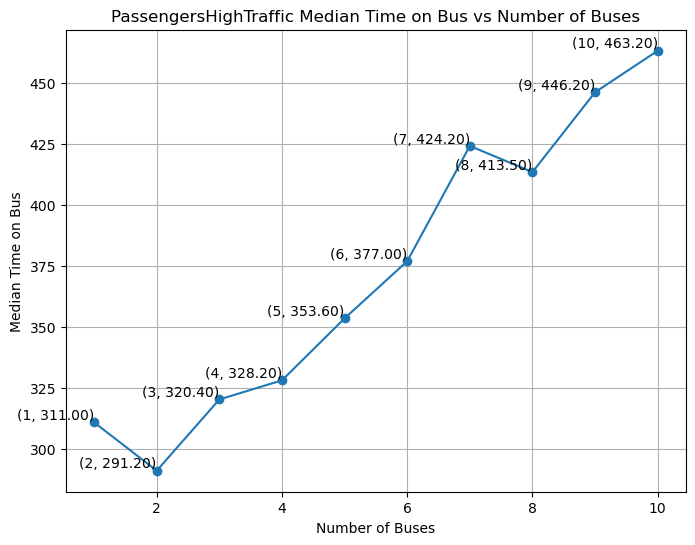

In [73]:
# Create ordered pairs using index + 1 as x and original value as y
x_values = np.arange(1, len(medians_TimeOnBus) + 1)  # Index + 1 for x-values
ordered_pairs = list(zip(x_values, medians_TimeOnBus))

# Unzip ordered pairs to separate x and y values for plotting
x, y = zip(*ordered_pairs)
plt.figure(figsize=(8, 6))
plt.plot(x, y, marker='o', linestyle='-')
plt.title(experiment + ' Median Time on Bus vs Number of Buses')
plt.xlabel('Number of Buses')
plt.ylabel('Median Time on Bus')
plt.grid(True)
for i, (x_val, y_val) in enumerate(ordered_pairs):
    plt.text(x_val, y_val, f'({x_val}, {y_val:.2f})', ha='right', va='bottom')
plt.show()

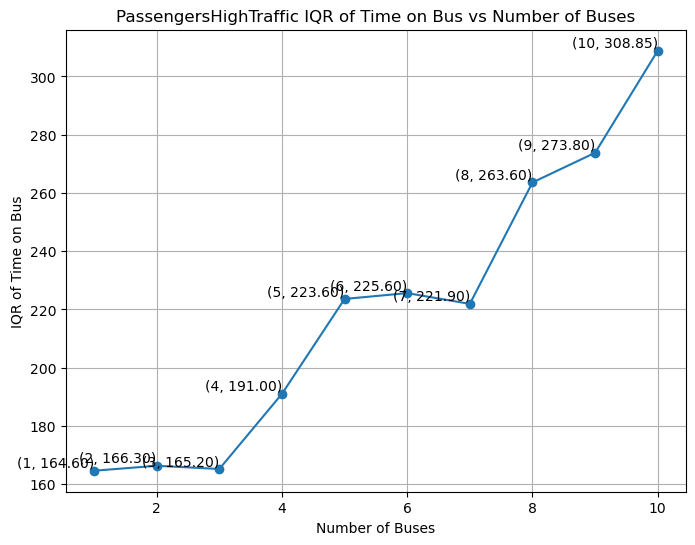

In [74]:
# Create ordered pairs using index + 1 as x and original value as y
x_values = np.arange(1, len(iqr_TimeOnBus) + 1)  # Index + 1 for x-values
ordered_pairs = list(zip(x_values, iqr_TimeOnBus))

# Unzip ordered pairs to separate x and y values for plotting
x, y = zip(*ordered_pairs)
plt.figure(figsize=(8, 6))
plt.plot(x, y, marker='o', linestyle='-')
plt.title(experiment + ' IQR of Time on Bus vs Number of Buses')
plt.xlabel('Number of Buses')
plt.ylabel('IQR of Time on Bus')
plt.grid(True)
for i, (x_val, y_val) in enumerate(ordered_pairs):
    plt.text(x_val, y_val, f'({x_val}, {y_val:.2f})', ha='right', va='bottom')
plt.show()

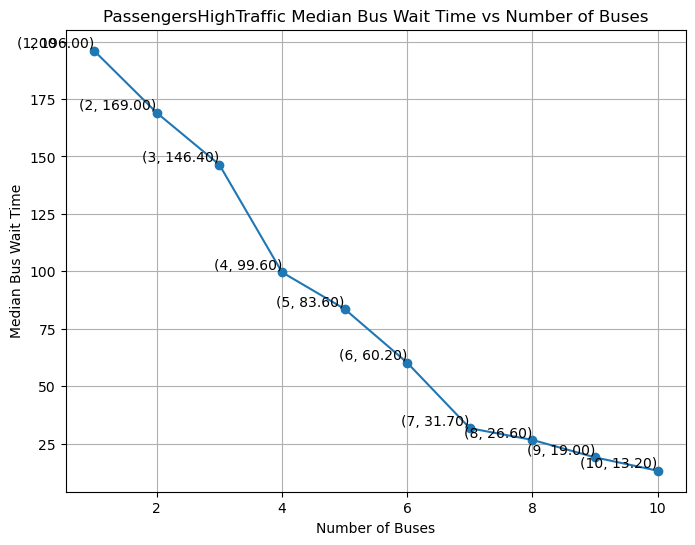

In [75]:
x_values = np.arange(1, len(medians_BusWaitTime) + 1)  # Index + 1 for x-values
ordered_pairs = list(zip(x_values, medians_BusWaitTime))

# Unzip ordered pairs to separate x and y values for plotting
x, y = zip(*ordered_pairs)
plt.figure(figsize=(8, 6))
plt.plot(x, y, marker='o', linestyle='-')
plt.title(experiment + ' Median Bus Wait Time vs Number of Buses')
plt.xlabel('Number of Buses')
plt.ylabel('Median Bus Wait Time')
plt.grid(True)
for i, (x_val, y_val) in enumerate(ordered_pairs):
    plt.text(x_val, y_val, f'({x_val}, {y_val:.2f})', ha='right', va='bottom')
plt.show()

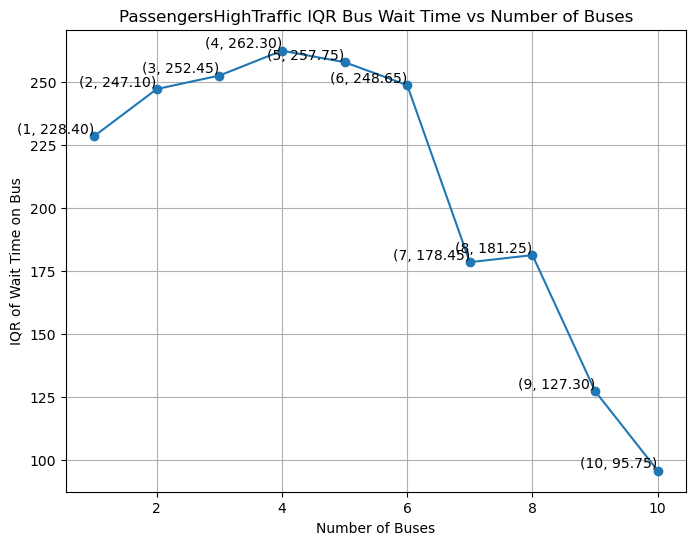

In [76]:
x_values = np.arange(1, len(iqr_BusWaitTime) + 1)  # Index + 1 for x-values
ordered_pairs = list(zip(x_values, iqr_BusWaitTime))

# Unzip ordered pairs to separate x and y values for plotting
x, y = zip(*ordered_pairs)
plt.figure(figsize=(8, 6))
plt.plot(x, y, marker='o', linestyle='-')
plt.title(experiment + ' IQR Bus Wait Time vs Number of Buses')
plt.xlabel('Number of Buses')
plt.ylabel('IQR of Wait Time on Bus')
plt.grid(True)
for i, (x_val, y_val) in enumerate(ordered_pairs):
    plt.text(x_val, y_val, f'({x_val}, {y_val:.2f})', ha='right', va='bottom')
plt.show()

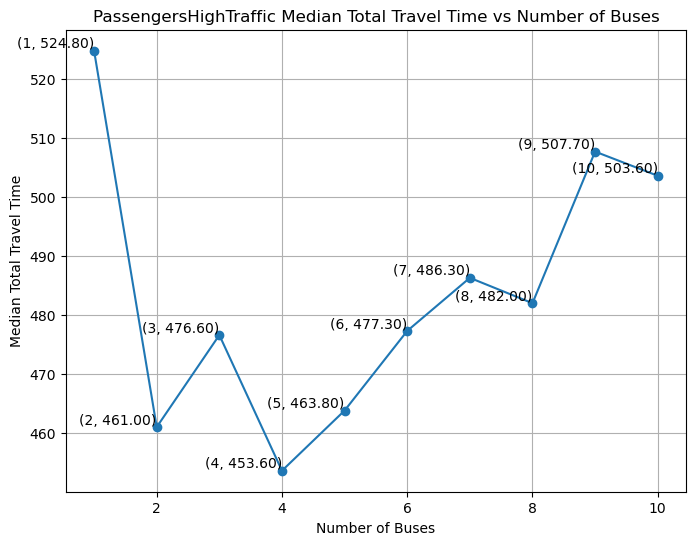

In [77]:
x_values = np.arange(1, len(medians_TotalTravelTime) + 1)  # Index + 1 for x-values
ordered_pairs = list(zip(x_values, medians_TotalTravelTime))

# Unzip ordered pairs to separate x and y values for plotting
x, y = zip(*ordered_pairs)
plt.figure(figsize=(8, 6))
plt.plot(x, y, marker='o', linestyle='-')
plt.title(experiment + ' Median Total Travel Time vs Number of Buses')
plt.xlabel('Number of Buses')
plt.ylabel('Median Total Travel Time')
plt.grid(True)
for i, (x_val, y_val) in enumerate(ordered_pairs):
    plt.text(x_val, y_val, f'({x_val}, {y_val:.2f})', ha='right', va='bottom')
plt.show()

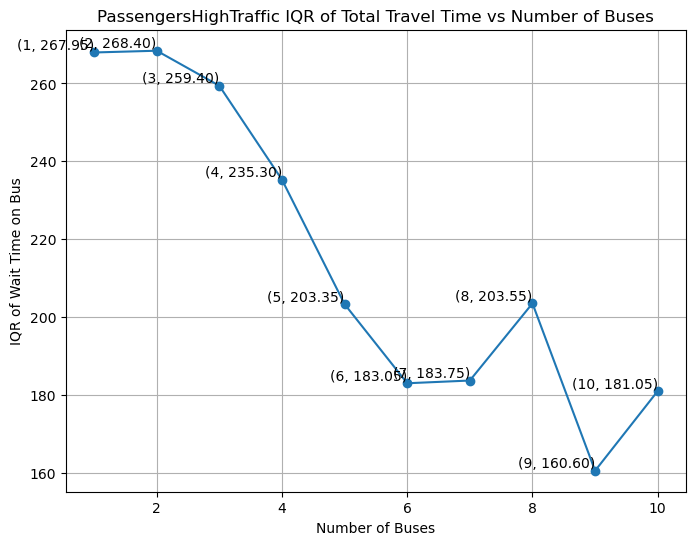

In [78]:
x_values = np.arange(1, len(iqr_TotalTravelTime) + 1)  # Index + 1 for x-values
ordered_pairs = list(zip(x_values, iqr_TotalTravelTime))

# Unzip ordered pairs to separate x and y values for plotting
x, y = zip(*ordered_pairs)
plt.figure(figsize=(8, 6))
plt.plot(x, y, marker='o', linestyle='-')
plt.title(experiment + ' IQR of Total Travel Time vs Number of Buses')
plt.xlabel('Number of Buses')
plt.ylabel('IQR of Wait Time on Bus')
plt.grid(True)
for i, (x_val, y_val) in enumerate(ordered_pairs):
    plt.text(x_val, y_val, f'({x_val}, {y_val:.2f})', ha='right', va='bottom')
plt.show()